In [1]:
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from netCDF4 import Dataset 
import shapefile as shp  # Requires the pyshp package
from plot_map import plot_single_map
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import sem

In [2]:
#loading in data to correct dataframe
regions = ['northwest','california']#,'','','','',]
yearList = ['2016','2017','2018']
subject = "1_GW_Wind_results"
masterDict = dict()
locationData = np.ones((3,270))
boxplotIndexFixData = dict()
#figure size for graphs
figureSize = [10,7.5]
#loading in by region and year, stores in location by year
for region in regions:
    masterDict[region] = np.ones((3,270))
    boxplotIndexFixData[region] =  np.ones((4,270))
    boxplotIndexFixData[region][0] = np.nan
    for index,year in enumerate(yearList):
        filepath = "%s/%s/%s.csv" % (region,year,subject)
        data = pd.read_csv(filepath)
        data = data.sort_values(by=['latitude', 'longitude'])
        masterDict[region][index] = data["ELCC"]
        boxplotIndexFixData[region][index+1] = data["ELCC"]

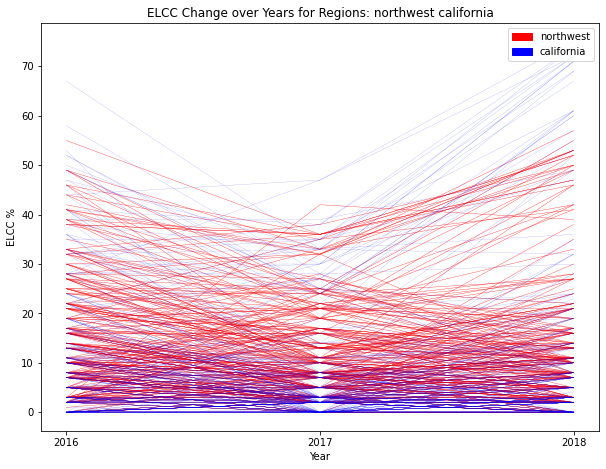

In [3]:
#basic line plot, not the very best representation for only three years, can tinker with the lineweights to change contrasts
colors = ['red','blue']
lineWeights = [.3,.1]
handleList = []
plt.figure(figsize=(figureSize[0],figureSize[1]))
for lineColor,region,lineWeight in zip(colors,regions,lineWeights):
    plt.plot(masterDict[region], color=lineColor,linewidth=lineWeight)
    handle = mpatches.Patch(color=lineColor, label=region)
    handleList.append(handle)
    
#formating
plt.xlabel('Year')
plt.ylabel('ELCC %')
plt.title('ELCC Change over Years for Regions: ' + ' '.join(regions))
plt.legend(handles=handleList,loc="upper right")
plt.xticks(np.arange(3), ('2016', '2017', '2018'))
plt.show()

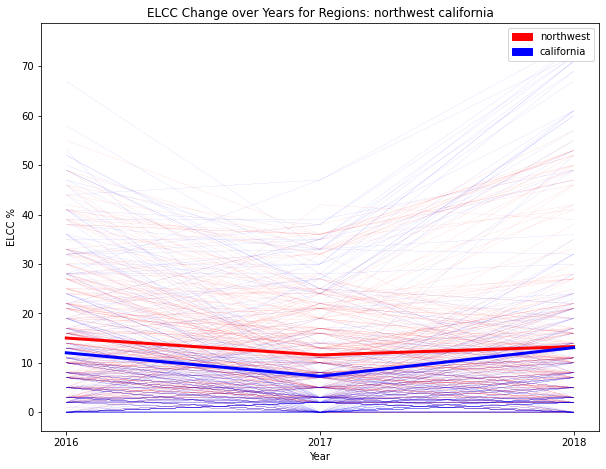

In [4]:
##Plot for mean changes of lines overlaid onto prior image but faded more

colors = ['red','blue']
lineWeights = [.05,.05]
plt.figure(figsize=(figureSize[0],figureSize[1]))
for lineColor,region,lineWeight in zip(colors,regions,lineWeights):
    plt.plot(masterDict[region], color=lineColor,linewidth=lineWeight)


#looking at mean values of each and plotting over, new loop due to lineWeight difference
for lineColor,region in zip(colors,regions):
    plt.plot(masterDict[region].mean(axis=1), color=lineColor,linewidth=3)

plt.xlabel('Year')
plt.ylabel('ELCC %')
plt.title('ELCC Change over Years for Regions: ' + ' '.join(regions))
#plt.legend(loc="upper right")
plt.xticks(np.arange(3), ('2016', '2017', '2018'))
plt.legend(handles=handleList,loc="upper right")

plt.show()

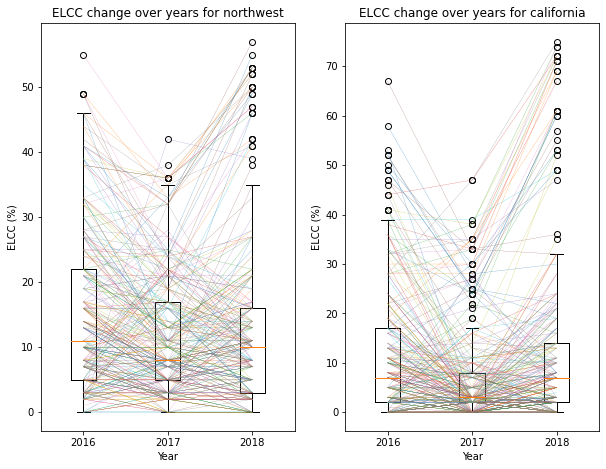

In [5]:
#mix of boxplot and line plots over each other first is with multi coloured lines next is with one color
#boxplot with each respective year and associated means, can't see specific variations by location however
# I personally like this one better then the one with all colors because youre able to track the changes over years for a specific cord
# Creating axes instance
lineWeight = .2
color = 'blue'
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at zero)
    
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.boxplot(boxplotData,labels = yearList) 
    plt.plot(boxplotIndexFixData[region],linewidth=lineWeight)
    plt.title("ELCC change over years for %s" %(region))
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")

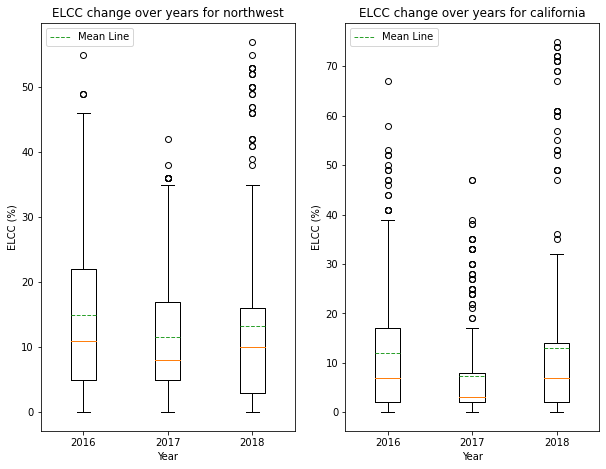

In [6]:
#boxplot with each respective year and associated means, can't see specific variations by location however
# Creating axes instance
plt.figure(figsize=(figureSize[0],figureSize[1]))
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    # Creating plot 
    test = plt.boxplot(boxplotData,labels = yearList,showmeans = True,meanline = True) 
    plt.title("ELCC change over years for %s" %(region))
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")
    plt.legend([test["means"][0]], ['Mean Line'], loc='upper left')

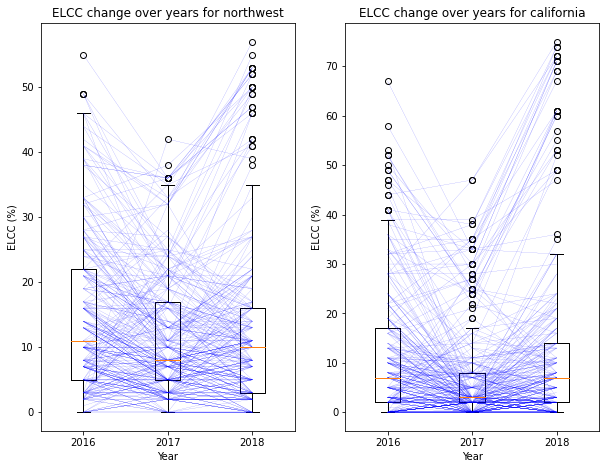

In [7]:
#mix of boxplot and line plots with set color such as blue
# Creating axes instance
lineWeight = .1
color = 'blue'
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at nans)
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.boxplot(boxplotData,labels = yearList)
    plt.title("ELCC change over years for %s" %(region))
    plt.plot(boxplotIndexFixData[region],linewidth=lineWeight,color=color)
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")

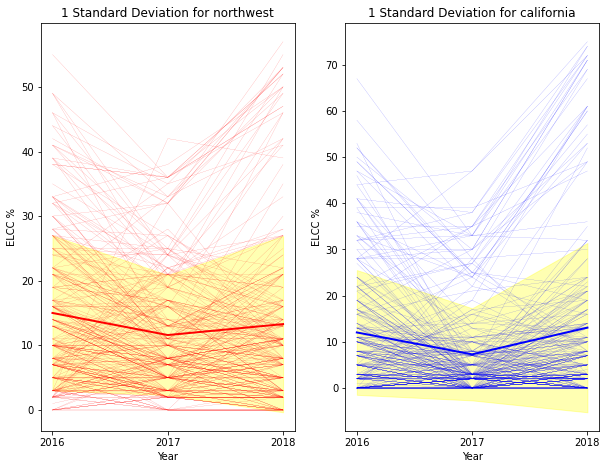

In [8]:
#plot with faded errors of 1 standard deviation in data (would need to fix the bottem portions 
#so they stop at zero if we wanted to go with this option)

plt.figure(figsize=(figureSize[0],figureSize[1]))

lineWeights = [.1,.1]
for index,lineColor,region,lineWeight in zip(enumerate(colors),colors,regions,lineWeights):
    plt.subplot(1,2,index[0]+1)
    plt.plot(masterDict[region], color=lineColor,linewidth=lineWeight)
    mean = masterDict[region].mean(axis=1)
    std = np.std(masterDict[region], axis = 1)
    plt.plot(mean, color=lineColor, lw=2) 
    plt.fill_between([0,1,2],mean - std, mean + std, color='yellow',alpha=.3)  


    # Plot settings
    plt.xlabel('Year')
    plt.ylabel('ELCC %')
    plt.title('1 Standard Deviation for ' + region)
    plt.xticks(np.arange(3), ('2016', '2017', '2018'))
plt.show()

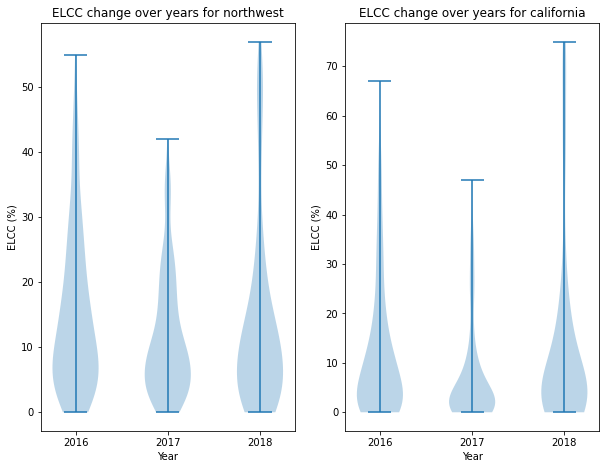

In [9]:
#violin plots by themselves!
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at nans)
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.violinplot(boxplotData)
    plt.title("ELCC change over years for %s" %(region))
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")
    plt.xticks(np.arange(1,4), ('2016', '2017', '2018'))


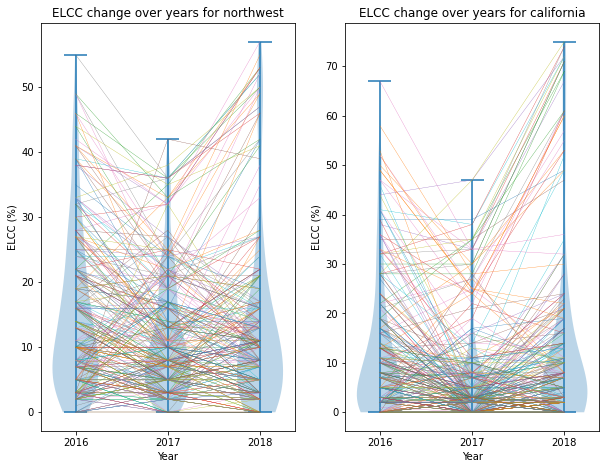

In [10]:
#violin plots overlaid with unique colors!
lineWeight = .3
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at nans)
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.violinplot(boxplotData)
    plt.title("ELCC change over years for %s" %(region))
    plt.plot(boxplotIndexFixData[region],linewidth=lineWeight)
    plt.xticks(np.arange(1,4), ('2016', '2017', '2018'))
    plt.xlabel("Year")
    plt.ylabel("ELCC (%)")

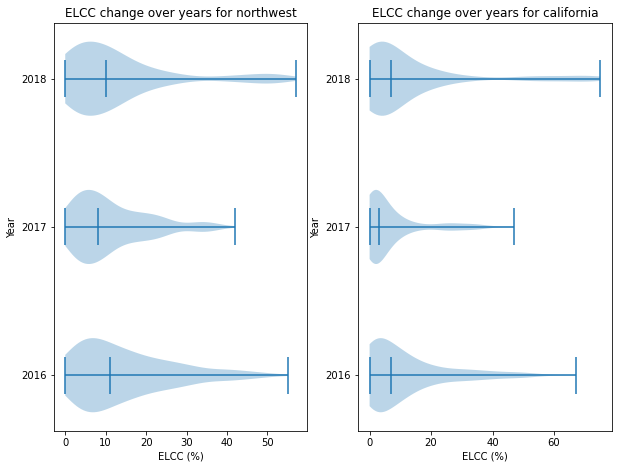

In [11]:
#violin plots flipped (not sure how to plot the data on this flipped version, but can do if we want to pursue this option)
#lines displayed are the medians too
lineWeight = .3
plt.figure(figsize=(figureSize[0],figureSize[1]))
#need to use boxplotIndexFixData update (just includes another row that starts at nans)
for index,region in enumerate(regions):
    boxplotData = [masterDict[region][0],masterDict[region][1],masterDict[region][2]]
    plt.subplot(1,2,index+1)
    plt.violinplot(boxplotData,vert = False,showmedians = True)
    plt.title("ELCC change over years for %s" %(region))
    plt.yticks(np.arange(1,4), ('2016', '2017', '2018'))
    plt.ylabel("Year")
    plt.xlabel("ELCC (%)")

In [13]:
#3d plot for ELCC values my guess for why we have bunches like that so high up is due to Offshore wind
#some weird stuff starts to happen when we swicth to solar though...

%matplotlib widget
fig = plt.figure(figsize=(figureSize[0],figureSize[1]))
ax = fig.add_subplot(111, projection='3d')
test = masterDict[region][0:2]
ax.scatter(masterDict[region][0],masterDict[region][1],masterDict[region][2])#,masterDict[region][2])
ax.set_xlabel('ELLC % (from 2016)')
ax.set_ylabel('ELLC % (from 2017)')
ax.set_zlabel('ELLC % (from 2018)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …